## **Prediction of renewable energy generation (solar and wind) of india using machine learning**

### Importing important libraries

In [46]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### Reading Data

In [47]:
df = pd.read_excel('Solar Generation.xlsx', 
                 parse_dates = ['Date'], index_col = 'Date')

In [48]:
# Checking shape of our data
print("Total number of rows and columns in the data are   : ",df.shape[0],',', df.shape[1])

Total number of rows and columns in the data are   :  1912 , 1


In [49]:
df.head()

,Solar Generation(MU)
Date,
2017-01-01,26.0
2017-01-02,28.0
2017-01-03,25.0
2017-01-04,29.0
2017-01-05,19.0


In [50]:
df.tail()

,Solar Generation(MU)
Date,
2022-03-23,227.0
2022-03-24,237.0
2022-03-25,233.0
2022-03-26,237.0
2022-03-27,248.0


In [51]:
# Checking for null values
df.isnull().sum().any()

False

In [52]:
df.describe()

,Solar Generation(MU)
count,1912.000000
mean,117.744885
std,55.192891
min,19.000000
25%,77.000000
50%,116.530000
75%,157.250000
max,266.000000


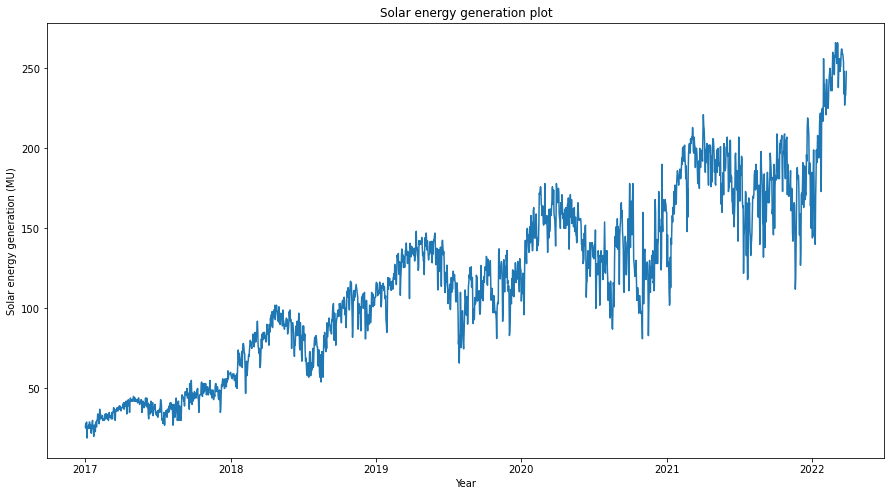

In [53]:
#plot graph
plt.figure(figsize=(15,8))
plt.xlabel('Year')
plt.ylabel('Solar energy generation (MU)')
plt.title('Solar energy generation plot')
plt.plot(df)

In [54]:
#Determine rolling statistics
rolmean = df.rolling(window=12).mean()
rolstd = df.rolling(window=12).std()
print(rolmean, rolstd)

            Solar Generation(MU)
Date                            
2017-01-01                   NaN
2017-01-02                   NaN
2017-01-03                   NaN
2017-01-04                   NaN
2017-01-05                   NaN
...                          ...
2022-03-23            251.916667
2022-03-24            250.750000
2022-03-25            249.250000
2022-03-26            247.416667
2022-03-27            246.250000

[1912 rows x 1 columns]             Solar Generation(MU)
Date                            
2017-01-01                   NaN
2017-01-02                   NaN
2017-01-03                   NaN
2017-01-04                   NaN
2017-01-05                   NaN
...                          ...
2022-03-23             11.049133
2022-03-24             11.863811
2022-03-25             12.920210
2022-03-26             12.971706
2022-03-27             12.144022

[1912 rows x 1 columns]


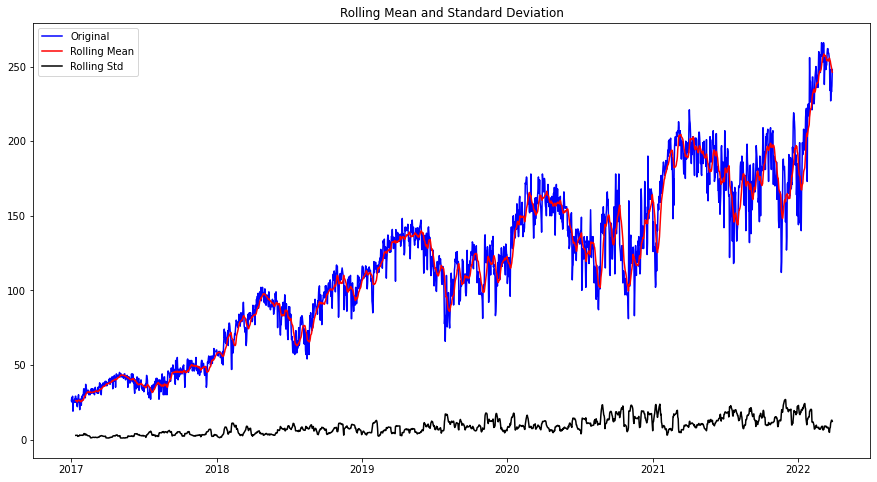

In [55]:
plt.figure(figsize=(15,8))
orig = plt.plot(df, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

In [56]:
# Augemented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
print("Augemented Dickey-Fuller Test")
dftest = esult=adfuller(df['Solar Generation(MU)'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistics','p-value','Lags Used','Number of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Augemented Dickey-Fuller Test
Test Statistics                  -0.542540
p-value                           0.883444
Lags Used                        23.000000
Number of observations used    1888.000000
Critical Value (1%)              -3.433818
Critical Value (5%)              -2.863072
Critical Value (10%)             -2.567586
dtype: float64


#### Transforming data inorder to achieve stationarity

**Log scale transforrmation**

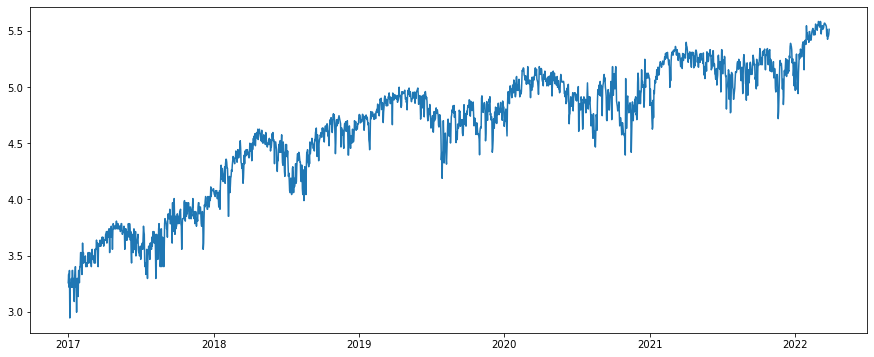

In [57]:
df_logScale = np.log(df)
plt.figure(figsize=(15,6))
plt.plot(df_logScale)

Text(0.5, 1.0, 'Rolling mean of wind energy after using log function')

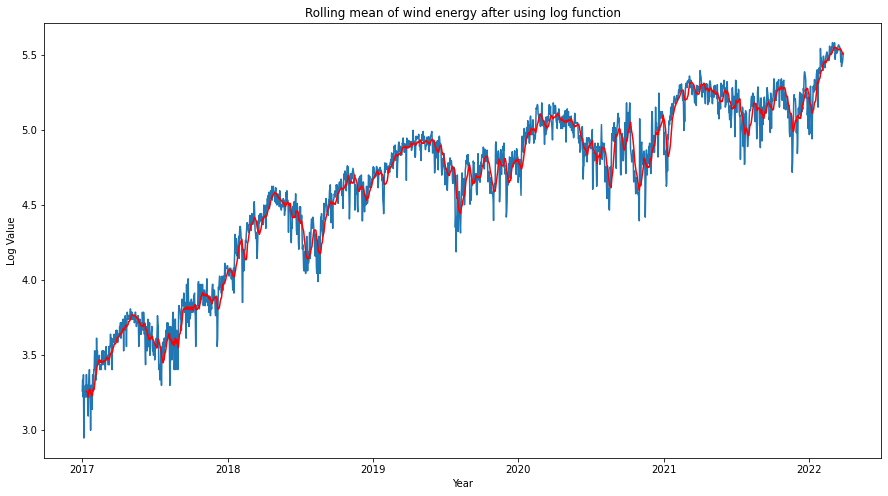

In [58]:
#This transformation will help to make series stationary
movingAverage = df_logScale.rolling(window=12).mean()
movingSTD =df_logScale.rolling(window=12).std()
plt.figure(figsize=(15,8))
plt.plot(df_logScale)
plt.plot(movingAverage, color='red')
plt.xlabel('Year')
plt.ylabel('Log Value')
plt.title('Rolling mean of wind energy after using log function')


In [59]:
resultseries = df_logScale - movingAverage
resultseries.head(12)

resultseries.dropna(inplace=True)
resultseries.head(10)

,Solar Generation(MU)
Date,
2017-01-12,0.111790
2017-01-13,-0.033361
2017-01-14,0.046631
2017-01-15,-0.106764
2017-01-16,-0.128194
2017-01-17,0.047317
2017-01-18,0.074241
2017-01-19,0.131308
2017-01-20,-0.051013


Text(0, 0.5, 'Log value of solar energy generaion')

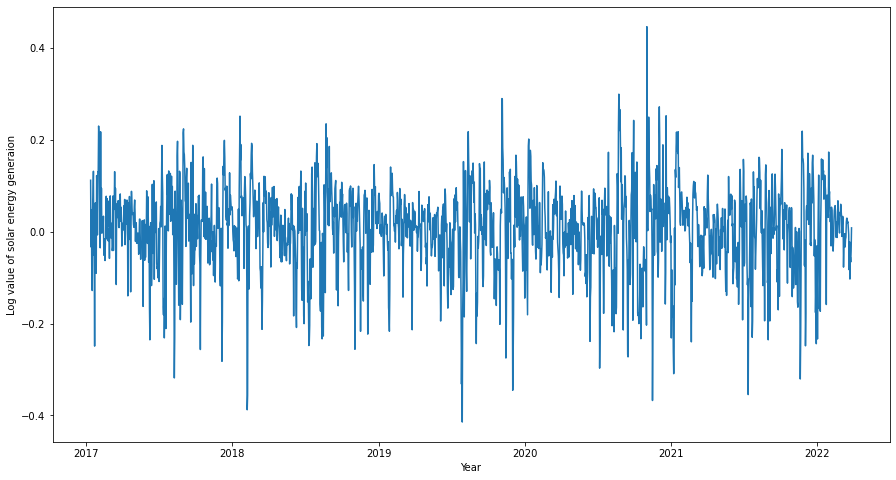

In [60]:
plt.figure(figsize=(15,8))
plt.plot(resultseries)
plt.xlabel('Year')
plt.ylabel('Log value of solar energy generaion')


In [61]:
def test_stationarity(timeseries):
    #Determining Rolling Statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #plotting rolling statistics
    print(plt.figure(figsize=(15,8)))
    orig = plt.plot(timeseries, color='black',label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(timeseries,color='yellow', label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation of Solar energy generation (MU)')
    plt.xlabel('Year')
    plt.ylabel('Values after differencing')
    plt.show(block=False)
    
    #Perform DIckey-Fuller Test
    print('Augemented Dickey-Fuller Test')
    dftest = adfuller(timeseries['Solar Generation(MU)'],autolag ='AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        print(dfoutput)

Figure(1080x576)


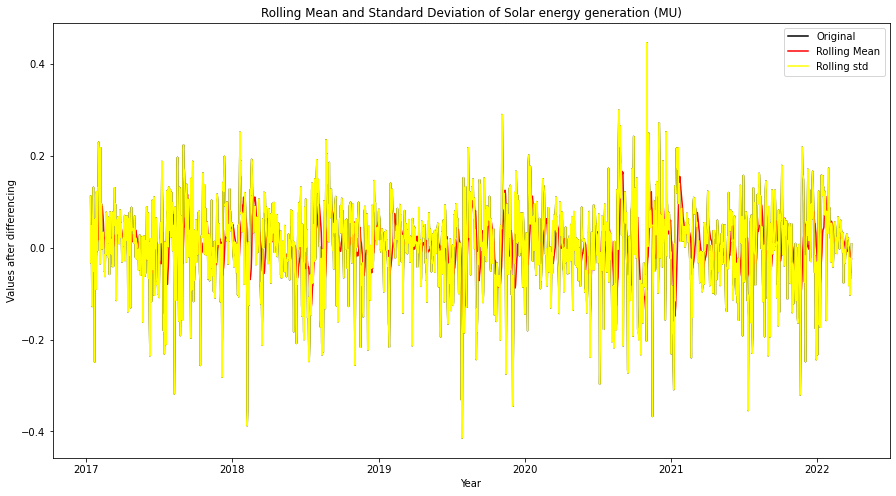

Augemented Dickey-Fuller Test
Test Statistic                -1.179278e+01
p-value                        9.736951e-22
Lags Used                      2.100000e+01
Number of Observations Used    1.879000e+03
Critical Value (1%)           -3.433835e+00
dtype: float64
Test Statistic                -1.179278e+01
p-value                        9.736951e-22
Lags Used                      2.100000e+01
Number of Observations Used    1.879000e+03
Critical Value (1%)           -3.433835e+00
Critical Value (5%)           -2.863079e+00
dtype: float64
Test Statistic                -1.179278e+01
p-value                        9.736951e-22
Lags Used                      2.100000e+01
Number of Observations Used    1.879000e+03
Critical Value (1%)           -3.433835e+00
Critical Value (5%)           -2.863079e+00
Critical Value (10%)          -2.567590e+00
dtype: float64


In [62]:
test_stationarity(resultseries)

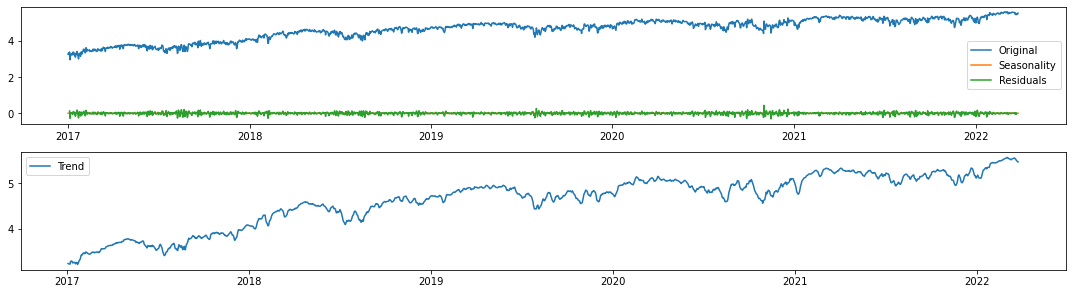

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(15,8))
plt.subplot(411)
plt.plot(df_logScale, label='Original')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()


**Time shift transformation**

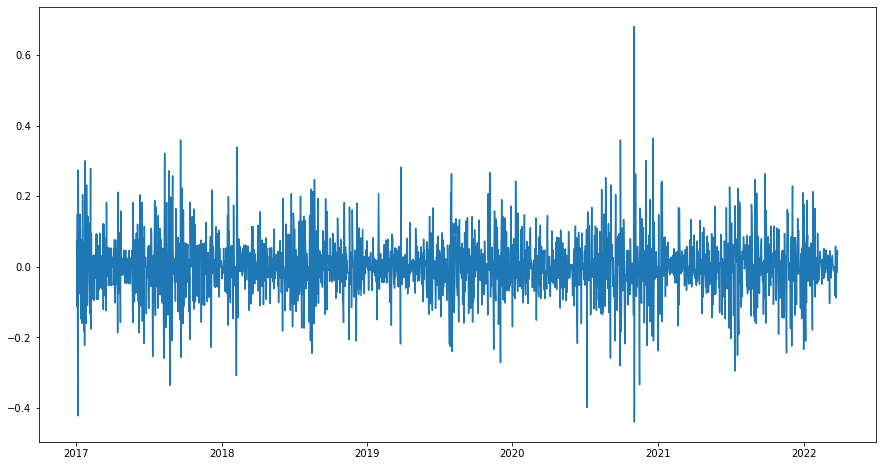

In [64]:
datasetLogDiffShifting = df_logScale - df_logScale.shift()
plt.figure(figsize=(15,8))
plt.plot(datasetLogDiffShifting)

Figure(1080x576)


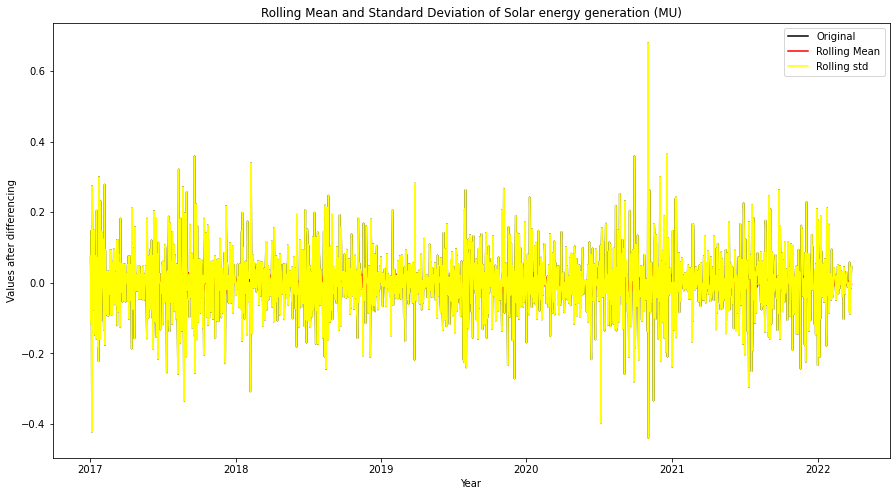

Augemented Dickey-Fuller Test
Test Statistic                -1.252575e+01
p-value                        2.490901e-23
Lags Used                      2.200000e+01
Number of Observations Used    1.888000e+03
Critical Value (1%)           -3.433818e+00
dtype: float64
Test Statistic                -1.252575e+01
p-value                        2.490901e-23
Lags Used                      2.200000e+01
Number of Observations Used    1.888000e+03
Critical Value (1%)           -3.433818e+00
Critical Value (5%)           -2.863072e+00
dtype: float64
Test Statistic                -1.252575e+01
p-value                        2.490901e-23
Lags Used                      2.200000e+01
Number of Observations Used    1.888000e+03
Critical Value (1%)           -3.433818e+00
Critical Value (5%)           -2.863072e+00
Critical Value (10%)          -2.567586e+00
dtype: float64


In [65]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

#### ACF and PACF

In [66]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

C:\Users\wazid\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'Autocorrelation Function')

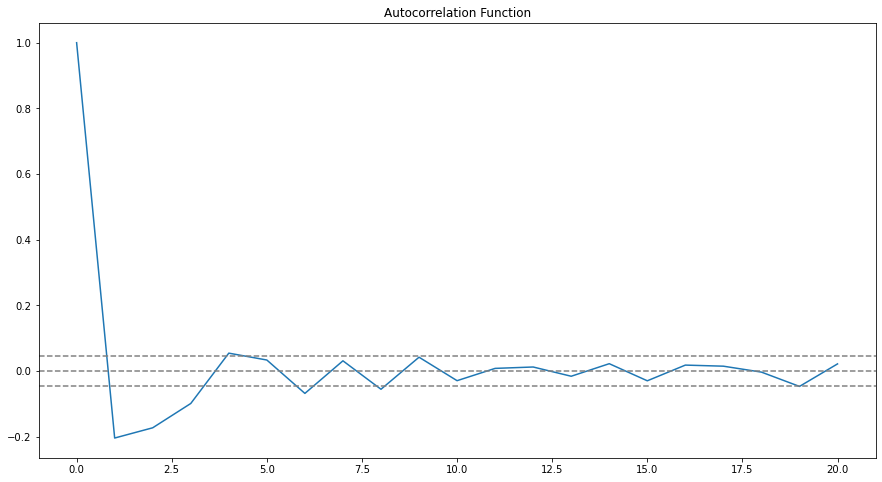

In [67]:
plt.figure(figsize=(15,8))
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

Text(0.5, 1.0, 'Partial Autocorrelation Function')

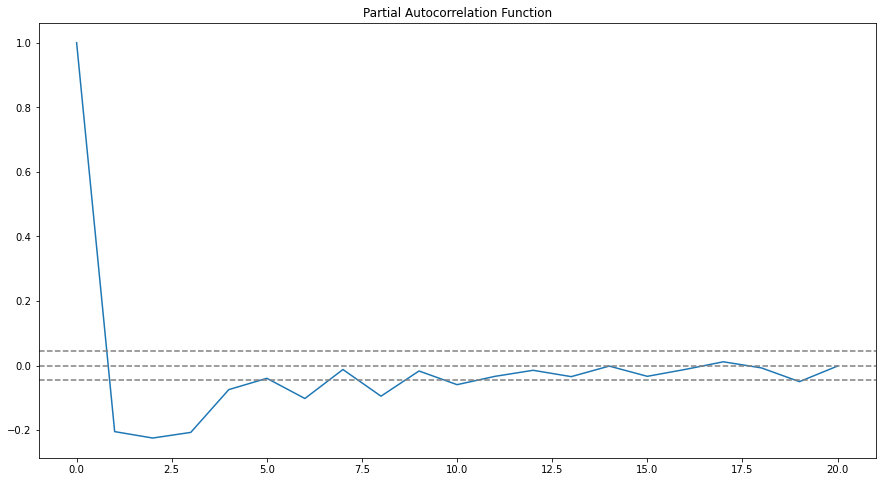

In [68]:
plt.figure(figsize=(15,8))
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

C:\Users\wazid\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\wazid\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Plotting AR Model


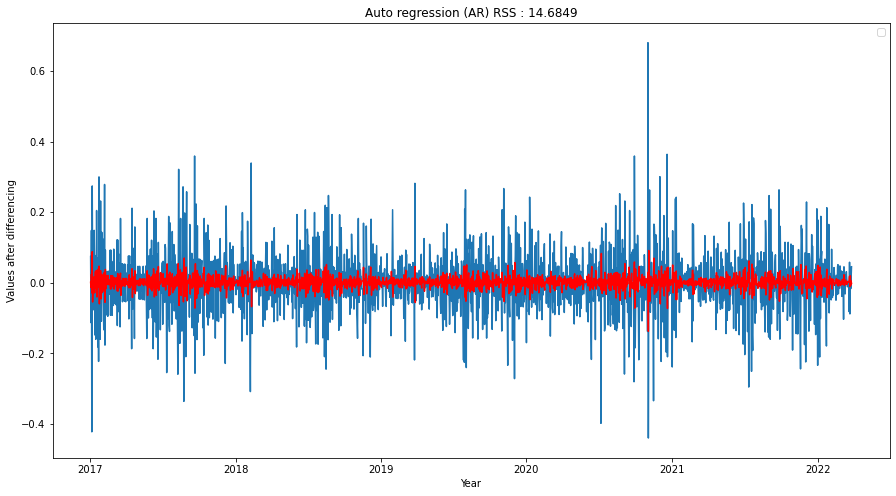

In [93]:
from statsmodels.tsa.arima_model import ARIMA
#AR Model
model = ARIMA(df_logScale, order=(1,1,0))
results_AR = model.fit(disp=-1)
plt.figure(figsize=(15,8))
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('Auto regression (AR) RSS : %.4f'%sum((results_AR.fittedvalues -datasetLogDiffShifting['Solar Generation(MU)'])**2))
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Values after differencing')
print('Plotting AR Model')

Plotting MA model


C:\Users\wazid\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\wazid\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


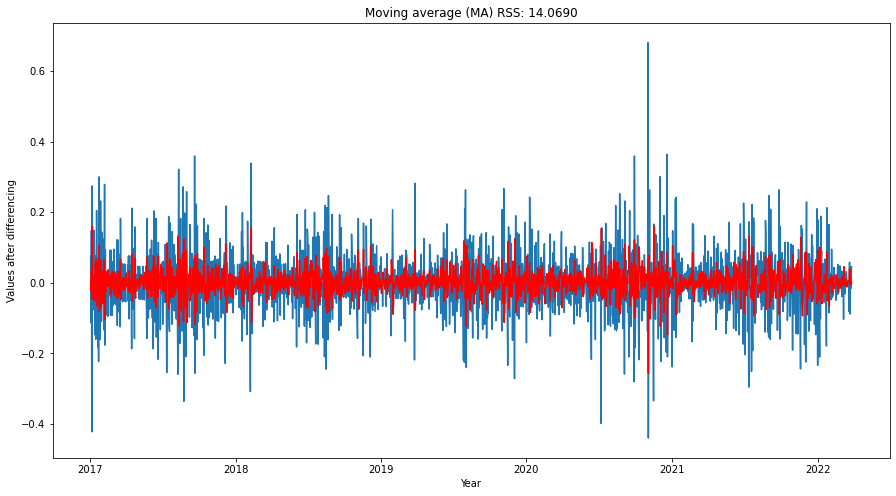

In [94]:
#MA Model
model = ARIMA(df_logScale, order=(0,1,1))
results_MA = model.fit(disp=-1)
plt.figure(figsize=(15,8))
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('Moving average (MA) RSS: %.4f'%sum((results_MA.fittedvalues - datasetLogDiffShifting['Solar Generation(MU)'])**2))
plt.xlabel('Year')
plt.ylabel('Values after differencing')
print('Plotting MA model')

C:\Users\wazid\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\wazid\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\wazid\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnin

Plotting ARIMA model


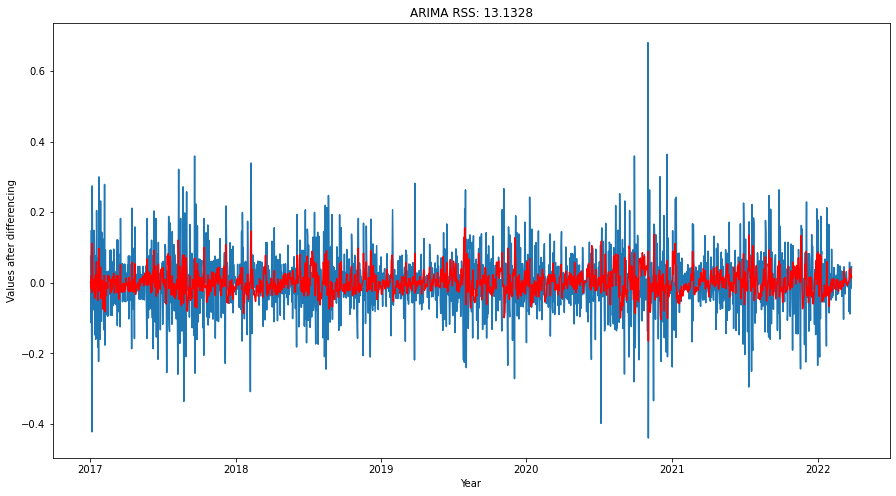

In [95]:
model = ARIMA(df_logScale, order=(1,1,1))
results_ARIMA = model.fit(disp=-1)
plt.figure(figsize=(15,8))
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('ARIMA RSS: %.4f'%sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['Solar Generation(MU)'])**2))
plt.xlabel('Year')
plt.ylabel('Values after differencing')
print('Plotting ARIMA model')

In [72]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2017-01-02    0.001183
2017-01-03   -0.015810
2017-01-04    0.019552
2017-01-05   -0.028445
2017-01-06    0.111675
dtype: float64


In [73]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

Date
2017-01-02    0.001183
2017-01-03   -0.014627
2017-01-04    0.004925
2017-01-05   -0.023520
2017-01-06    0.088156
                ...   
2022-03-23    2.189608
2022-03-24    2.230949
2022-03-25    2.251452
2022-03-26    2.275568
2022-03-27    2.290663
Length: 1911, dtype: float64


In [74]:
predictions_ARIMA_log = pd.Series(df_logScale['Solar Generation(MU)'].iloc[0], index=df_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Date
2017-01-01    3.258097
2017-01-02    3.259280
2017-01-03    3.243469
2017-01-04    3.263022
2017-01-05    3.234577
dtype: float64

In [75]:
np.array(predictions_ARIMA_log)

array([3.25809654, 3.2592796 , 3.24346918, ..., 5.50954844, 5.53366407,
       5.54875976])

Text(0, 0.5, 'log value')

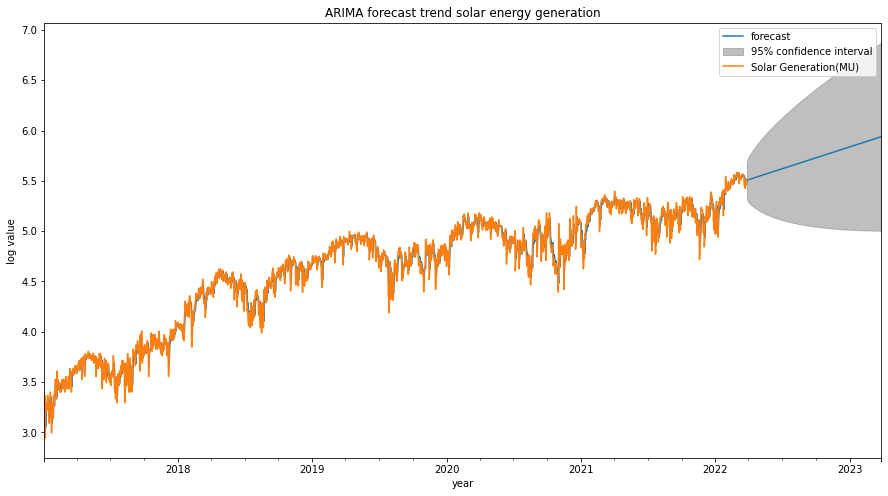

In [98]:
fig, ax = plt.subplots(figsize=(15, 8))
fig = results_ARIMA.plot_predict(1,2277,ax=ax) 
plt.title('ARIMA forecast trend solar energy generation')
plt.xlabel('year')
plt.ylabel('log value')

In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from math import sqrt

In [78]:
y_pred=np.array(results_ARIMA.predict(1,1911)).reshape(-1,1)
y_test = np.array(datasetLogDiffShifting).reshape(-1,1)

In [79]:
print(f"Mean Absolute Error            : {round(mean_absolute_error(y_pred,y_test),2)}")
print(f"Mean Squared Error             : {round(mean_squared_error(y_pred,y_test),2)}")
print(f"Root Mean Squared Error        : {round(sqrt(mean_squared_error(y_pred,y_test)),2)}")
print(f"Mean Absolute Percentage Error : {round(mean_absolute_percentage_error(y_pred,y_test),2)}")

Mean Absolute Error            : 0.06
Mean Squared Error             : 0.01
Root Mean Squared Error        : 0.08
Mean Absolute Percentage Error : 32.07


Text(0, 0.5, 'value')

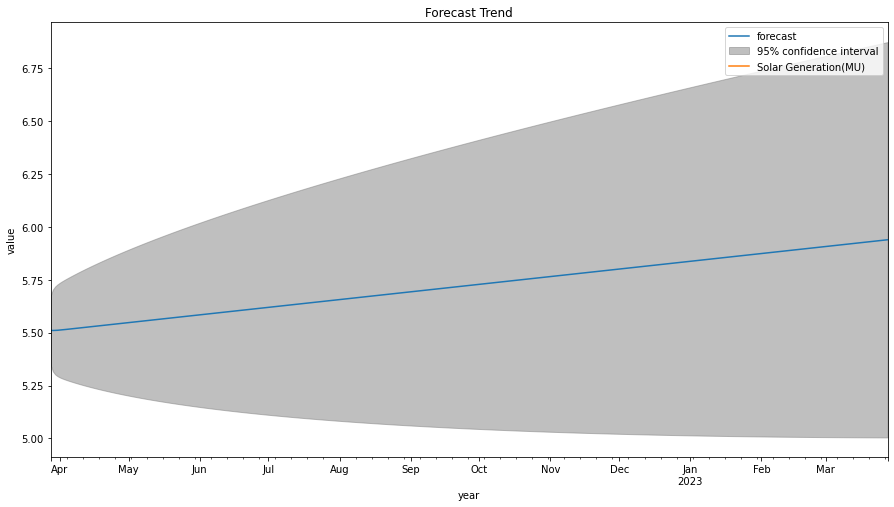

In [80]:
fig, ax = plt.subplots(figsize=(15, 8))
fig = results_ARIMA.plot_predict(1912,2277,ax=ax) 
plt.title('Forecast Trend')
plt.xlabel('year')
plt.ylabel('value')

In [81]:
np.exp(results_ARIMA.predict(1912,2277))

2022-03-28    0.997339
2022-03-29    0.999272
2022-03-30    1.000234
2022-03-31    1.000712
2022-04-01    1.000949
                ...   
2023-03-24    1.001184
2023-03-25    1.001184
2023-03-26    1.001184
2023-03-27    1.001184
2023-03-28    1.001184
Freq: D, Length: 366, dtype: float64

In [82]:
x=results_ARIMA.forecast(steps=365)

In [83]:
forecast = np.exp(np.array(pd.DataFrame(x).iloc[0,:]).reshape(-1,1).astype(float))
forecast

array([[247.34000811],
       [247.15993135],
       [247.21767646],
       [247.39361766],
       [247.62845263],
       [247.89273597],
       [248.17183553],
       [248.45847744],
       [248.74904513],
       [249.04174037],
       [249.3356691 ],
       [249.63038689],
       [249.92567295],
       [250.22141765],
       [250.51756671],
       [250.81409333],
       [251.11098438],
       [251.40823356],
       [251.70583793],
       [252.00379624],
       [252.30210808],
       [252.60077347],
       [252.8997926 ],
       [253.19916581],
       [253.49889345],
       [253.79897592],
       [254.09941363],
       [254.40020699],
       [254.70135643],
       [255.00286235],
       [255.30472519],
       [255.60694536],
       [255.90952329],
       [256.2124594 ],
       [256.51575412],
       [256.81940786],
       [257.12342106],
       [257.42779414],
       [257.73252752],
       [258.03762163],
       [258.34307691],
       [258.64889377],
       [258.95507264],
       [259

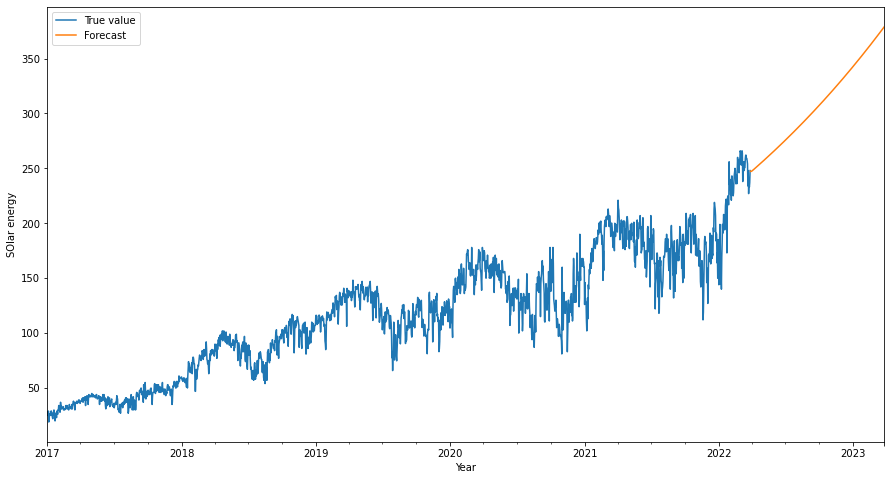

In [84]:
from datetime import datetime, timedelta
last_date = df.iloc[-1].name
modified_date = last_date + timedelta(days=1)
date=pd.date_range(modified_date,periods=365,freq='D')
df1=pd.DataFrame(forecast,columns=['Forecast'],index=date)
df = df.append(df1)
df['Solar Generation(MU)'].plot(figsize=(15,8), label = 'True value')
df['Forecast'].plot(label='Forecast')
plt.xlabel('Year')
plt.ylabel('SOlar energy')
plt.legend()

In [85]:
df1

,Forecast
2022-03-28,247.340008
2022-03-29,247.159931
2022-03-30,247.217676
2022-03-31,247.393618
2022-04-01,247.628453
...,...
2023-03-23,377.235041
2023-03-24,377.681597
2023-03-25,378.128683
2023-03-26,378.576297


In [86]:
df1.describe()

,Forecast
count,365.000000
mean,307.986902
std,38.376385
min,247.159931
25%,274.410358
50%,305.601916
75%,340.338942
max,379.024442
